In [59]:
%load_ext autoreload
%autoreload 2

import torch
from diffusers import DPMSolverMultistepScheduler
from text3d2video.ipython_utils import display_ims
from text3d2video.pipelines.sd_pipeline import SDPipeline
from text3d2video.style_aligned_attn import StyleAlignedAttentionProcessor

sd_repo = "runwayml/stable-diffusion-v1-5"
controlnet_repo = "lllyasviel/control_v11f1p_sd15_depth"

dtype = torch.float16
device = torch.device("cuda")

pipe = SDPipeline.from_pretrained(
    sd_repo, torch_dtype=dtype
).to(device)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

attn_processor = StyleAlignedAttentionProcessor()
pipe.unet.set_attn_processor(attn_processor)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:01<00:00, 11.44it/s]


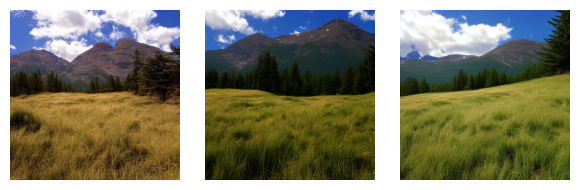

In [92]:
prompts = ["Desert Mountain", "Snowy Mountain", "Grassy Mountain"]

gen = torch.Generator(device=device)
gen.manual_seed(0)

ims = pipe(prompts, generator=gen, num_inference_steps=15)

display_ims(ims)